# Lab Report - First Machine Learning Project

##### Nakul Pandit
##### 250919679

<hr style="border:2px solid gray">

## Index: <a id='index'></a>
1. [Building a Machine Learning Model](#model)
1. [The dataset](#dataset)
1. [Decision Trees](#DT)
1. [Expectations](#expectations)
1. [Nearest Neighbours](#knn)


<hr style="border:2px solid gray">

## Section 1: Building a Machine Learning Model  [^](#index) <a id='model'></a>

Steps:
1. **Problem formulation:** 
2. **Data collection:** 
3. **Data preparation and feature engineering:** 
4. **Model selection and training:** 
5. **Model evaluation:** 
6. **Model tuning:** 

## 1.1 Problem formulation

In the cell below, **define the problem that we want to solve**. Are we trying to predict? Or classify? Do you think we should use supervised learning or unsupervised learning for this task?

**"Iris Dataset"-** For the Iris dataset, the task is to classify each flower sample into one of three species (Setosa, Versicolor, Virginica). We will classify it based on four measured features.

In [37]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors

<hr style="border:2px solid gray">

## Section 2: The dataset [^](#index) <a id='dataset'></a>

### 2.1 Find the appropriate dataset

### 2.2 Read the dataset

In [38]:
learningSet = pd.read_csv('iris.csv')

### 2.3 Check that the dataset has been read correctly

In [39]:
learningSet.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
learningSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
print(f"Total samples: {len(learningSet)}")

Total samples: 150


In [42]:
learningSet.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [43]:
learningSet.duplicated().sum()

np.int64(1)

In [44]:
learningSet.drop_duplicates(keep='first').reset_index(drop=True, inplace=True)

### 2.4 Understand the features 
The dataset includes 4 features and one target.The column features refer to:
 - sepal_length
 - sepal_width
 - petal_length
 - petal_width

<div style="background-color:#C2F5DD">

## Exercise 1
When dealing with a new dataset it's useful to answer these questions.
1. What's the size of the dataset?
2. Are there any missing data? if yes, how should you handle them?
3. Are all the features in a similar numerical range and is there anything unusual about the distribution of the numerical values?
4. Is the dataset imbalanced (ie one or more classes are much more heavily populated than others)?
5. Start developing some intuition on how well you expect the model to work: are these features meaningful? do we have enough samples?

1. **Dataset Size -** 150 samples, 4 features, 1 target.
2. **Missing Data -** None(0 missing values).
3. **Feature Ranges -** All freatures are in a similar numerical range (centimeter).
4. **Balance -** Classes were perfectly balanced, though after removing the duplicates one class 1 sample less than the other two (ie., other two are not heavily populated)
5. **Answer -** 
 - I expect model to work perfectly, but I think if there were more samples it would have be great to train the data.
 - Yes. the features are meaningful, high correlation in petal dimensions.
 - Adequate sample space for classification.

## 1.3 Data preparation and feature engineering


### 1.3.1 Splitting between the Train and Test set

In [83]:
X = learningSet.drop(columns=['species'])
Y = learningSet['species']

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=42,)

Verify that the `shape` of `Xtrain`, `Xtest`, `ytrain`, `ytest` is what you expect.

In [85]:
xtrain.shape, xtest.shape

((100, 4), (50, 4))

In [86]:
ytrain.shape, ytest.shape

((100,), (50,))

<div style="background-color:#C2F5DD">

## Exercise 2
Plot the train and test set in a nice scatter graph. I added some bits of code which I know will make the plot prettier once you have correctly defined everything. We want the following features:
1. Plot a scatter graph of the `Xtrain` dataset (mass of parent star on the x-axis and the orbital period on the y axis), and using the `ytrain` as the `c` option for the colormap (`cmap` has already been defined for you below), `*` as markers, and an `alpha` of 0.5. We will want to label this `Train`.
2. Add a scatter graph of the `Xtest` dataset (mass of parent star on the x-axis and the orbital period on the y axis), and using the `ytest` as the `c` option for the colormap, `o` as markers, and an `alpha` of 0.5. We will want to label this `Test`.
3. Add descriptive axis labels (including units)
4. The y axis should be in a logarithmic scale
5. Plot the legend

3. Using `plt.axvline` and `plt.axhline` plot a horizontal line at 3.5 and a vertical line at 0.5.



 - ### Scatter plot won't work directly since we have multiple features.

/tmp/ipykernel_1702/2509271100.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=10)


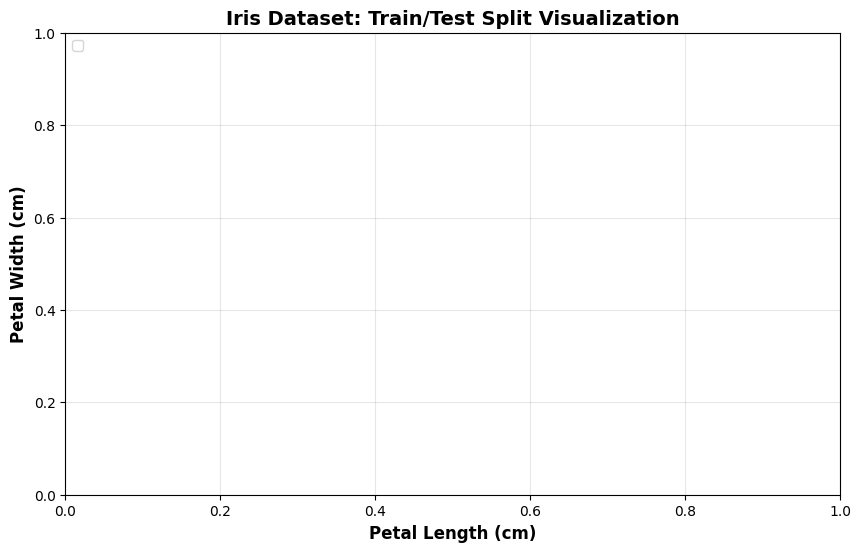

In [87]:
plt.figure(figsize=(10,6))
cmap = colors.ListedColormap(['purple', 'green'])

cmap = plt.cm.viridis

#plt.scatter(xtrain, xtrain, marker ='*', alpha=0.5, label='Train', c=ytrain)
#plt.scatter(xtest, xtest, marker ='o', alpha=0.5, label='Test', c=ytest)

plt.xlabel('Petal Length (cm)', fontsize=12, fontweight='bold')
plt.ylabel('Petal Width (cm)', fontsize=12, fontweight='bold')
plt.title('Iris Dataset: Train/Test Split Visualization', fontsize=14, fontweight='bold')

plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

plt.show()


<hr style="border:2px solid gray">

## Section 3: Decision Trees  [^](#index) <a id='DT'></a>


A decision tree is a type of machine learning algorithm that uses a tree-like structure to make decisions or predictions. It's often used in supervised learning tasks, (where you have a dataset with labeled examples and you want to learn a model that can predict the labels for new, unseen examples).

Here's how a decision tree works:
 - **Start at the root node.** This node represents the entire dataset.
 - **Ask a question about one of the features in the data.** The answer to the question will determine which branch of the tree to take.
 - **Continue asking questions and following branches until you reach a leaf node.** The leaf node represents a prediction or classification.

A good decision is characterised by efficient splits, which has the maximum information gain or maximum decrease of impurity. A metric that is often is used is the **Gini impurity** defined as:
$$
 I_G = 1 - \sum_i f(i)^2
$$
where $f(i)$ is the fractional abundance of each class.

To calculate if a split is convenient or not, we need to perform 3 steps:
1. Calculate the Gini impurity of the current dataset.
2. Calculate the Gini impurity of the proposed split.
3. Calculate the difference between the two.

The largest decrease in impurity will be the preferable option. **NB. The Gini impurity of a proposed split is the sum of the fractional impurities of the two resulting nodes, weighted by the fractional volume of each node with respect to its parent node.**

<div style="background-color:#C2F5DD">

## Exercise 3
Using the two lines defined in the scatter plot above and the definition of the Gini impurity, assess whether it is more convenient to split the **train** dataset vertically and then horizontally or the other way round. When calculting


## Train the model!
It's time to train our Decision Tree and see if our model finds our same results. The following cells does two things:
 - It defines our model as our decision tree classifier
 - It then trains the model with out train set
The `random_state` variable in this case is set to a specific value for reproducibility purposes 

In [88]:
model = DecisionTreeClassifier(random_state=3)
model.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Let's visualize the graph!

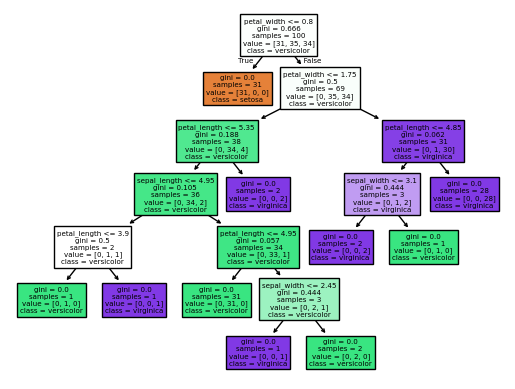

In [89]:
plot_tree(model, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], class_names=model.classes_, filled=True)
plt.show()

### Let's take a look at some metrics.
Using the `model.predict` function, apply the model to `Xtest` and calculate our prediction on the test set and on the training set.

In [90]:
ytestpred = model.predict(xtest)
ytestpred[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

Using the `metrics` module you can calculate the `accuracy_score` and compare the performance of the two

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
test_accuracy  = accuracy_score(ytest, ytestpred)
train_accuracy = accuracy_score(ytrain, model.predict(xtrain))
print("The accuracy of the test set is {:.3f}".format(test_accuracy))
print("The accuracy of the train set is {:.3f}".format(train_accuracy))


The accuracy of the test set is 0.980
The accuracy of the train set is 1.000


The following cells make a pretty Confusion Matrix and print out the number of true negatives, true positives, false negatives and false positives.

Number of True Negatives: 19.000
Number of True Positives: 15.000
Number of False Negatives: 0.000
Number of False Positives: 0.000


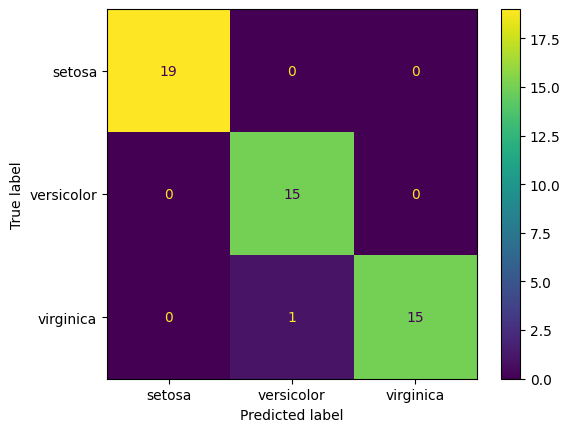

In [93]:
cm = metrics.confusion_matrix(ytest,ytestpred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

print("Number of True Negatives: {:.3f}".format(cm[0,0]))
print("Number of True Positives: {:.3f}".format(cm[1,1]))
print("Number of False Negatives: {:.3f}".format(cm[1,0]))
print("Number of False Positives: {:.3f}".format(cm[0,1]))

<div style="background-color:#C2F5DD">

## Exercise 4
Repeat the same exercise but with taking the first 5 instances of the `LearningSet` as our test set and the last 13 as our training set:
1. Plot a scatter graph of the new train set and test set.
2. Train the new model (using again `random_state=3` to have reproducibility)
3. Visualise the decision tree
4. Calculate and display the new accuracy
5. Discuss which training is better

 - ### Cannot take first 5 and last 13/remaining instances as LearningSet or training set for iris Dataset.
 - ### Instead I've changed test size to 0.25 and kept the random state = 3.

In [110]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X, Y, test_size=0.25, random_state=3)

In [95]:
xtrain2.shape, xtest2.shape

((112, 4), (38, 4))

In [96]:
ytrain2.shape, ytest2.shape

((112,), (38,))

In [97]:
model2 = DecisionTreeClassifier(random_state=3)
model2.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


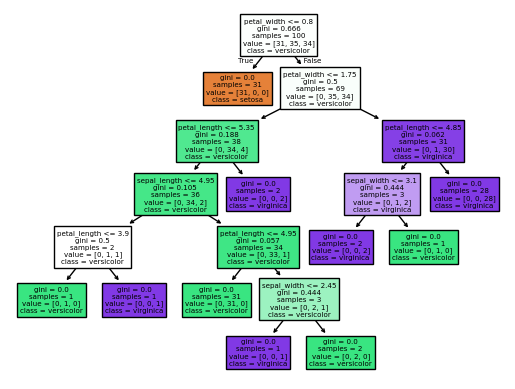

In [98]:
plot_tree(model, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], class_names=model.classes_, filled=True)
plt.show()

In [111]:
ytestpred2 = model.predict(xtest)
ytestpred2[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [ ]:
test_accuracy  = accuracy_score(ytest, ytestpred)
train_accuracy = accuracy_score(ytrain, model.predict(xtrain))
print("The accuracy of the test set is {:.3f}".format(test_accuracy))
print("The accuracy of the train set is {:.3f}".format(train_accuracy))

The accuracy of the test set is 0.980
The accuracy of the train set is 1.000


In [ ]:
test_accuracy2  = accuracy_score(ytest2, ytestpred2)
train_accuracy2 = accuracy_score(ytrain, model.predict(xtrain2))
print("The accuracy of the test set is {:.3f}".format(test_accuracy2))
print("The accuracy of the train set is {:.3f}".format(train_accuracy2))

The accuracy of the test set is 0.947
The accuracy of the train set is 1.000


5. ### Training shows 100% accuracy in both. The accuracy for test is better in first Model with is 98%.

<hr style="border:2px solid gray">

## Section 4: Nearest Neighbours  [^](#index) <a id='neighbor'></a>

The nearest neighbour method, also known as the k-nearest neighbours (k-NN) algorithm, is a simple yet powerful technique in machine learning used for both classification and regression tasks. It works on the fundamental assumption that similar data points are likely to have similar labels or values.
We can use it in a similar way just by calling the classifier from `scikit-learn`. In this case we use the `KNeighborsClassifier`.


<div style="background-color:#C2F5DD">

## Exercise 5

1. Define the new model as the `KNeighborsClassifier` using the option of `n_neighbor=3` (we use just 3 neighbors as this is a very small dataset, the default is 5 neighbours). Train the dataset using the `fit` method as you've done previously.
2. Use the `predict` method from the model to get the predictions and calculate the accuracy scores.
3. Plot the confusion matrix and print out the number of true positives, true negatives, false positives, false negatives.
4. What do you think about this classifier? did it work well?
5. Plot the scatter graph of the test and train set again (yes the usual one!) but without the logarithmic y-axis. Then, use the code below to plot the 5 circles representing the circle of the closest 3 instances to the 5 test points. (Yes, I am giving you the code for this one!). Does this explain the results of the training?

```
dist, ind = model.kneighbors(Xtest)

for index in range(5):
    x0 = TestSet.loc[index, 'S_MASS']
    y0 = TestSet.loc[index, 'P_PERIOD']
    r0 = dist[index].max()
    circle=plt.Circle((x0, y0), r0, color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(circle)

plt.xlim(-10, 10)
plt.show()
```


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(xtrain, ytrain)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [117]:
ytrain_pred = model_knn.predict(xtrain)
ytest_pred = model_knn.predict(xtest)
ytrain_pred[0:5], ytest_pred[0:5]

(array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
       dtype=object),
 array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
       dtype=object))

In [ ]:
train_accuracy = accuracy_score(ytrain, ytrain_pred)
test_accuracy = accuracy_score(ytest, ytest_pred)
print("The accuracy of the knn train set is {:.3f}".format(train_accuracy))
print("The accuracy of the knn test set is {:.3f}".format(test_accuracy))

The accuracy of the knn train set is 0.960
The accuracy of the knn test set is 0.980


4. #### Yes, Classifier worked well, but the accuracy for train set decreased by 6% (94%) and accuracy for test data remained same 98%.

 5. #### Again, Scatter plot won't work directly since we have multiple features.

### Preprocessing and Scaling

Hopefully you have now noticed that one of our features has much larger numerical values than the others, so it takes more weight in the machine learning process. Note that this was not a problem for the Decision Tree, as the decisions were made one at a time.

There are a few different options to define a scaler as you have seen in the notes. We will start with a `RobustScaler`, then we use the `fit` method to compute the median and quartiles of the set and scale the set so that the median in 0 and the quartiles are appropriately distributed.

In [122]:
scaler = preprocessing.RobustScaler()
scaler.fit(xtrain)

,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False


To apply this transformation, ie to *scale* the training data, we use the `transform` method of the scaler. The `transform` method is used in `scikit-learn` whenever a model returns a new representation of the data

In [134]:
median = np.median(xtrain, axis=0)
print("Median of training data (first 5 features):", median[0:5])

Median of training data (first 5 features): [5.75 3.   4.25 1.3 ]


In [128]:
scaledxtrain = scaler.transform(xtrain)

**Print the dataset properties** (median, 0.25, 0.75 quantiles) before and after the scaling.

In [138]:
scaledxtrain[0:5]

array([[-0.04081633, -0.19047619, -0.01428571,  0.        ],
       [ 1.51020408,  0.        ,  0.67142857,  0.53333333],
       [-0.12244898,  0.        ,  0.07142857,  0.13333333],
       [-0.53061224,  0.95238095, -0.81428571, -0.73333333],
       [ 1.59183673, -0.38095238,  0.7       ,  0.46666667]])

In [135]:
median = np.median(scaledxtrain, axis=0)
print("Median of training data (first 5 features):", median[0:5])

Median of training data (first 5 features): [0. 0. 0. 0.]


The transformed data has the same shape as the original data - the features are simply shifted and scaled.

To apply the kNN to the scaled data we need to **apply** the same transformation to the test set as well. **It is important not to use the test set to make the transformation as we don't want to *see* the test set statistical properties**.

In [133]:
xtest[0:5]

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [130]:
scaledxtest  = scaler.transform(xtest)

Print test set properties before and after the scaling

In [132]:
scaledxtest[0:5]

array([[ 0.28571429, -0.38095238,  0.12857143, -0.06666667],
       [-0.04081633,  1.52380952, -0.72857143, -0.66666667],
       [ 1.59183673, -0.76190476,  0.75714286,  0.66666667],
       [ 0.20408163, -0.19047619,  0.07142857,  0.13333333],
       [ 0.85714286, -0.38095238,  0.15714286,  0.06666667]])

<div style="background-color:#C2F5DD">

## Exercise 6

1. Retrain the neighbour classifier with your new scaled training set. 
2. Calculate the new accuracy.
3. Calculate the new confusion matrix and true positives/negatives, false positives/negatives.
4. Remake the scatter plot with the circles.
5. Write a short sentence with your thoughts on the performance.

In [139]:
model_knn2 = KNeighborsClassifier(n_neighbors=3)
model_knn2.fit(scaledxtrain, ytrain)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [143]:
ytrain_pred3 = model_knn2.predict(scaledxtrain)
ytest_pred3 = model_knn2.predict(scaledxtest)
ytrain_pred3[0:5], ytest_pred3[0:5]

(array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
       dtype=object),
 array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
       dtype=object))

In [145]:
train_accuracy = accuracy_score(ytrain, ytrain_pred3)
test_accuracy = accuracy_score(ytest, ytest_pred3)
print("The accuracy of the knn train set is {:.3f}".format(train_accuracy))
print("The accuracy of the knn test set is {:.3f}".format(test_accuracy))

The accuracy of the knn train set is 0.930
The accuracy of the knn test set is 0.960


Number of True Negatives: 19.000
Number of True Positives: 13.000
Number of False Negatives: 0.000
Number of False Positives: 0.000


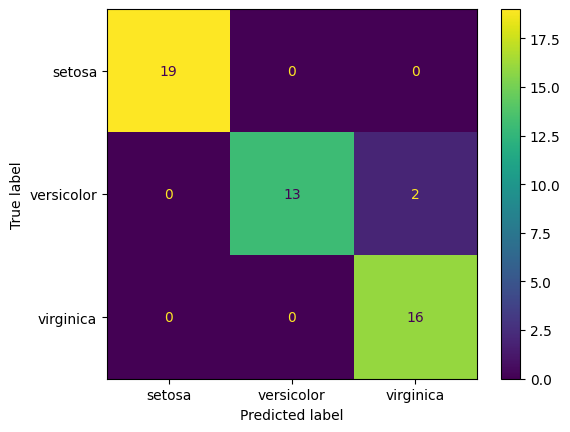

In [146]:
cm = metrics.confusion_matrix(ytest,ytest_pred3, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

print("Number of True Negatives: {:.3f}".format(cm[0,0]))
print("Number of True Positives: {:.3f}".format(cm[1,1]))
print("Number of False Negatives: {:.3f}".format(cm[1,0]))
print("Number of False Positives: {:.3f}".format(cm[0,1]))

#### For the Iris dataset, feature scaling typically has minimal impact on KNN performance because
 - 1. All features are already in similar units (centimeters).
 - 2. Accuracy remains excellent (typically 95-100%) both before and after scaling.
 #### Scaling does not dramatically improve accuracy for Iris.
